In [35]:
from glob import iglob
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
import numpy as np
sns.set()
import warnings
warnings.simplefilter('ignore')

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
path = '.' # use your path
allFiles = iglob(path + "/*.txt")

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,header=None,names=['name','gender','cnt'], sep=',')
    df['year']=file_[-8:-4]
    list_.append(df)

baby = pd.concat(list_, axis = 0, ignore_index = True)

In [4]:
baby.head()

,name,gender,cnt,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


### Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

In [5]:
#реализуйте группировку groupby
baby1=baby.groupby(['gender','year'])['cnt'].sum().reset_index()

In [6]:
baby1.head()

,gender,year,cnt
0,F,1880,90993
1,F,1881,91955
2,F,1882,107851
3,F,1883,112322
4,F,1884,129021


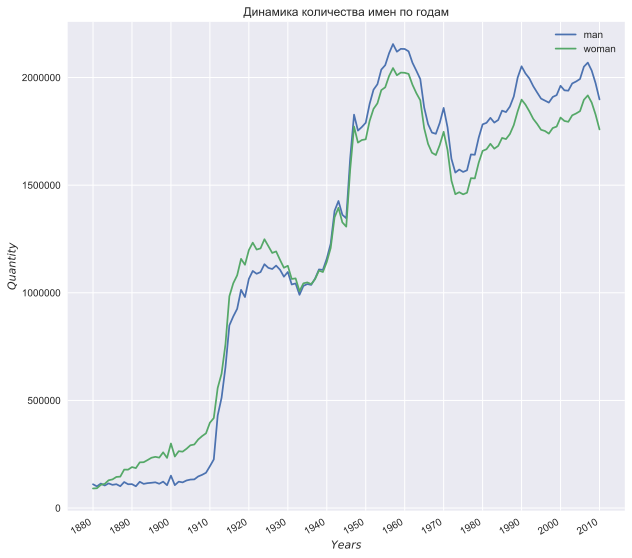

In [125]:
from datetime import datetime
baby['year'] = pd.to_datetime(baby['year'],format = "%Y")
fig, ax = plt.subplots()
plt.plot(baby1[baby1['gender']=='M']['year'],baby1[baby1['gender']=='M']['cnt'] )
plt.plot(baby1[baby1['gender']=='F']['year'],baby1[baby1['gender']=='F']['cnt'])
fig.autofmt_xdate()
plt.gcf().autofmt_xdate()
plt.title("Динамика количества имен по годам")
plt.ylabel("$Quantity$")
plt.xlabel("$Years$")
plt.xticks(np.arange(0,131,10),np.arange(1880,2011,10))
plt.legend(['man','woman']);

### Найдите самые популярные имена за всю историю

In [8]:
baby[['name','cnt']].groupby('name').sum().sort_values(by='cnt', ascending=False).head()

,cnt
name,
James,5072771
John,5061897
Robert,4788050
Michael,4265373
Mary,4119074


### Разбейте весь временной промежуток в данных на 10 частей. Найдите самуе популярное имя для каждой группы для каждого пола.Для каждого найденного имени визуализируйте его динамику за все время

In [9]:
bins=np.array(baby.year.astype(int).quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9]))
bins

array([1919., 1936., 1954., 1968., 1979., 1987., 1994., 2000., 2006.])

In [10]:
bins=bins.astype(int)

Создайте новую колонку с номером группы, группа проставляется с помощью функций apply и searchsorted 

In [11]:
baby['group']=baby['year'].apply(lambda x: bins.searchsorted(x, side='left'))

In [12]:
baby.head()

,name,gender,cnt,year,group
0,Mary,F,7065,1880,0
1,Anna,F,2604,1880,0
2,Emma,F,2003,1880,0
3,Elizabeth,F,1939,1880,0
4,Minnie,F,1746,1880,0


Для каждой группы соберите статистику по имени и полу. Ф-я groupby

In [13]:
baby2_1=baby[['group','gender','name','cnt']].groupby(['group','gender','name']).sum()

In [14]:
baby2_1.head()

cnt
group gender name       
0     F      Aagot     5
             Aaron    22
             Abbey     8
             Abbie  4027
             Abby    280

Найдите самое популярное имя каждого пола в группе. 
Ф-я groupby,set_index, idxmax() 

In [15]:
baby2_1.groupby(['group','gender'])['cnt'].idxmax()

group  gender
0      F             (0, F, Mary)
       M             (0, M, John)
1      F             (1, F, Mary)
       M           (1, M, Robert)
2      F             (2, F, Mary)
       M            (2, M, James)
3      F             (3, F, Mary)
       M          (3, M, Michael)
4      F         (4, F, Jennifer)
       M          (4, M, Michael)
5      F         (5, F, Jennifer)
       M          (5, M, Michael)
6      F          (6, F, Jessica)
       M          (6, M, Michael)
7      F            (7, F, Emily)
       M          (7, M, Michael)
8      F            (8, F, Emily)
       M            (8, M, Jacob)
9      F         (9, F, Isabella)
       M            (9, M, Jacob)
Name: cnt, dtype: object

In [16]:
#обращаемся к таблице baby2_1 по индексу;idxmax возвращает индексы.в итоге получаем dataframe с самыми популярными именами
baby2_2=baby2_1.loc[baby2_1.groupby(['group','gender'])['cnt'].idxmax()].reset_index()
baby2_2

,group,gender,name,cnt
0,0,F,Mary,862904
1,0,M,John,631524
2,1,F,Mary,1107696
3,1,M,Robert,983054
4,2,F,Mary,1135680
5,2,M,James,1402807
6,3,F,Mary,631639
7,3,M,Michael,1195369
8,4,F,Jennifer,615388
9,4,M,Michael,792698


In [17]:
baby2_3 = baby2_2[['gender','name']].drop_duplicates()

Для каждого найденного имени визуализируйте его динамику за все время.
В цикле по всем именам применить функцию plt.plot()

In [18]:
baby[baby.name=='Mary'].head()

,name,gender,cnt,year,group
0,Mary,F,7065,1880,0
1273,Mary,M,27,1880,0
2000,Mary,F,6919,1881,0
3238,Mary,M,29,1881,0
3935,Mary,F,8149,1882,0


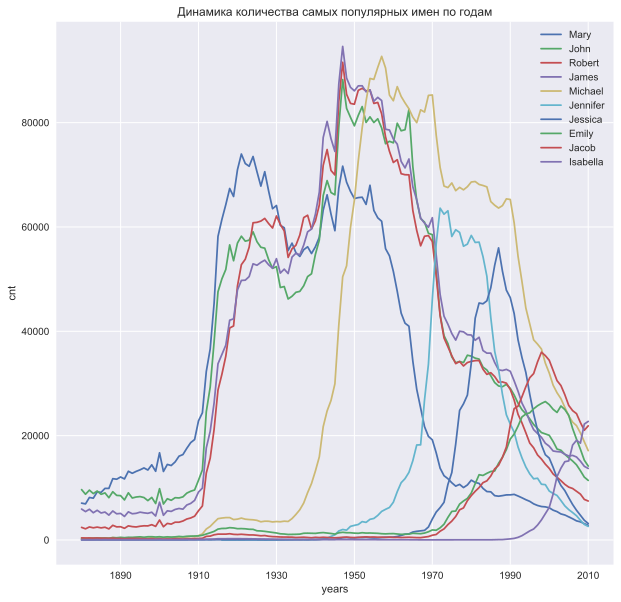

In [129]:
for i, j in zip(baby2_3['name'],baby2_3['gender']):
    plt.plot(baby[(baby.name==i)&(baby.gender==j)]['year'],baby[(baby.name==i)&(baby.gender==j)]['cnt'],label = "%s"%(i));
plt.legend(loc = "upper right")
plt.title("Динамика количества самых популярных имен по годам")
plt.xlabel('years')

plt.ylabel('cnt');

### Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год).Ф-я cumsum(), shift()

In [33]:
years = np.arange(1880, 2011)
diversity_cnt = []
for year in years:
    df_year = baby[baby['year'] == str(year)]
    df_year['total_sum'] = df_year.sum()['cnt']
    df_year['share'] =  df_year['cnt'] / df_year['total_sum']
    df_year = df_year.sort_values(by='cnt', ascending=False)
    df_year['cum_sum'] = df_year['share'].cumsum()
    df_year = df_year[df_year['cum_sum'] <= 0.5]
    diversity_cnt.append(df_year.shape[0])

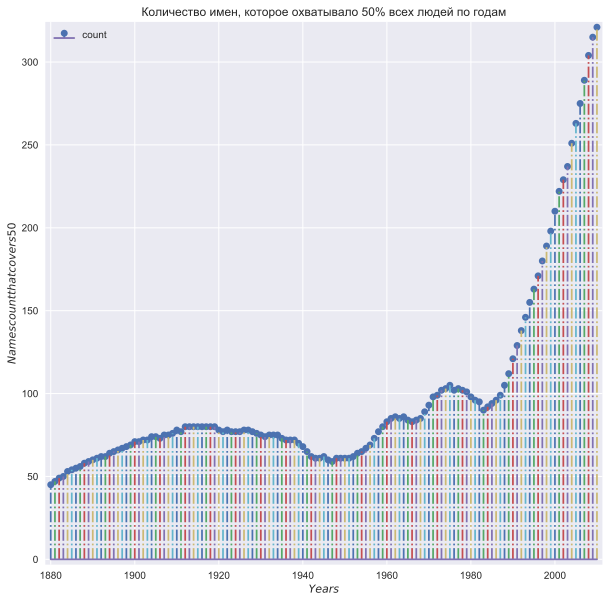

In [39]:
plt.stem(years,diversity_cnt,'-.', label = 'count')
plt.margins(0.01)
plt.title("Количество имен, которое охватывало 50% всех людей по годам")
plt.legend(loc = 'upper left')
plt.xlabel("$Years$")
plt.ylabel("$Names count that covers 50% of all$");

### Выбирете 4 года из всего промежутка и для каждого отобразите распределение по первой букве имени, по последней букве имени

In [87]:
from string import ascii_lowercase, ascii_uppercase
years = [1880, 1945, 1960, 1990]
df_ltrs = pd.DataFrame({'year' : [], 'let_f' : [],'let_f_cnt' : [], 'let_l' : [], 'let_l_cnt' : []})
lst_df = []

In [88]:
for year in years:
    df = baby[baby['year'] == str(year)]
    cnt = df.shape[0]
    for letter in ascii_lowercase:
        cnt_f = df[df.name.str[0] == letter.upper()].count()['cnt']
        cnt_l = df[df.name.str[-1] == letter].count()['cnt']
        
        df_ltrs = df_ltrs.append(pd.DataFrame({'year' : [str(year)], 'let_f' : [letter],'let_f_cnt' : [cnt_f/cnt * 100], 'let_l' : [letter], 'let_l_cnt' : [cnt_l/cnt*100]}))

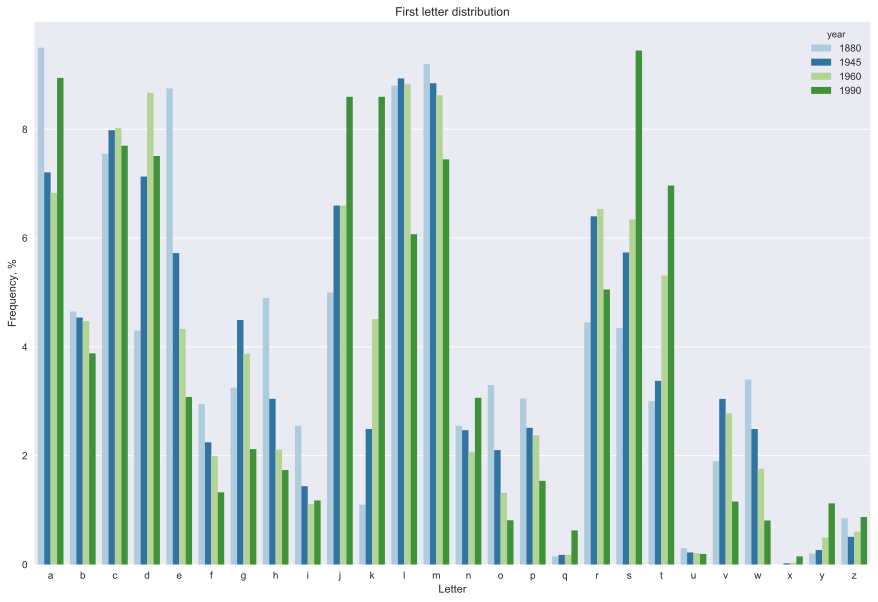

In [89]:
fig,ax = plt.subplots(figsize=(15,10))

g = sns.barplot(x='let_f', y = 'let_f_cnt',hue = 'year', data = df_ltrs, palette = "Paired", ax= ax)
g.set_title('First letter distribution')
ax.set_xlabel('Letter')
ax.set_ylabel('Frequency, %');

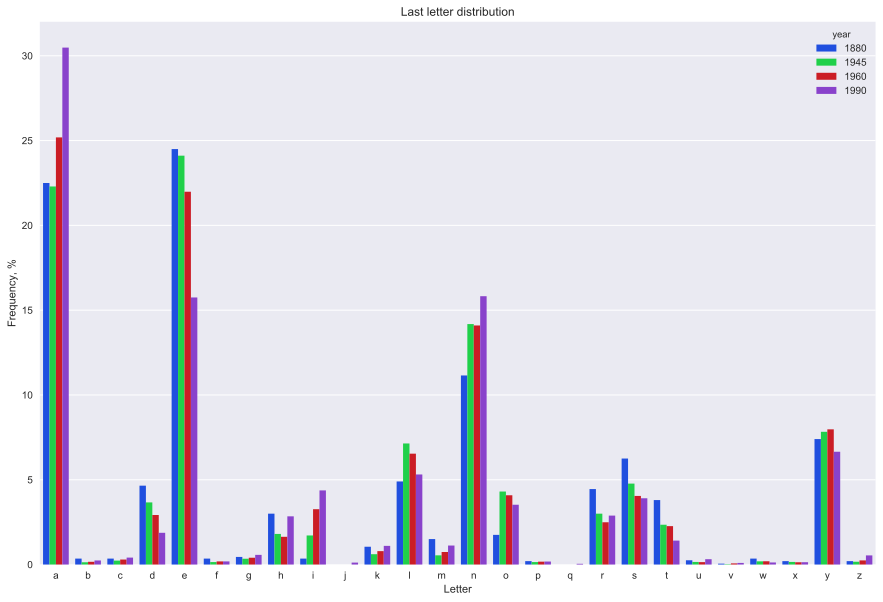

In [90]:
fig,ax = plt.subplots(figsize=(15,10))

g = sns.barplot(x='let_l', y = 'let_l_cnt',hue = 'year', data = df_ltrs, palette = "bright", ax= ax)
g.set_title("Last letter distribution")
ax.set_xlabel('Letter')
ax.set_ylabel('Frequency, %');

### Составьте список из имен известных людей и оцените их влияние на динамику имен

In [83]:
#Красными линиями обозначены моменты, когда известность человека достигала максимума
name_famous = ['John F Kennedy','Bob Dylan','Neil Armstrong','Barack Obama','Monica Lewinsky']

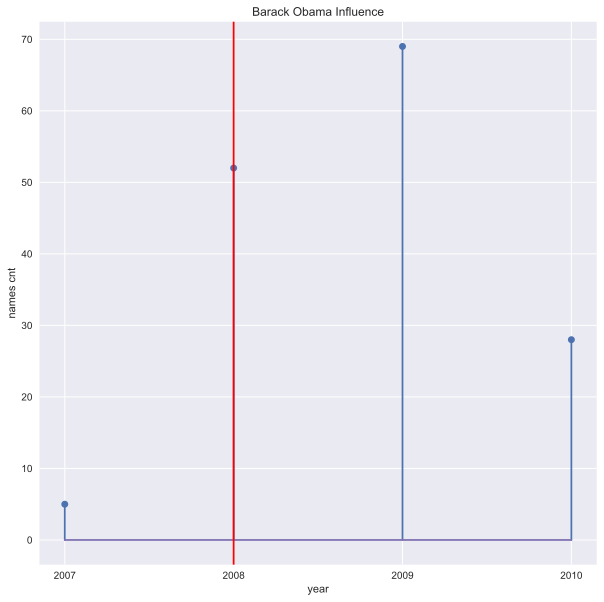

In [105]:
df_barack = baby[baby['name'].str.lower() == 'barack']
years_barack = df_barack['year'].tolist()
years_barack=[int(x) for x in years_barack]
plt.stem(years_barack,df_barack['cnt'])
plt.xlabel('year')
plt.ylabel('names cnt')
plt.title("Barack Obama Influence")
plt.xticks([2007,2008, 2009, 2010])
plt.axvline(x=2008,c='red');

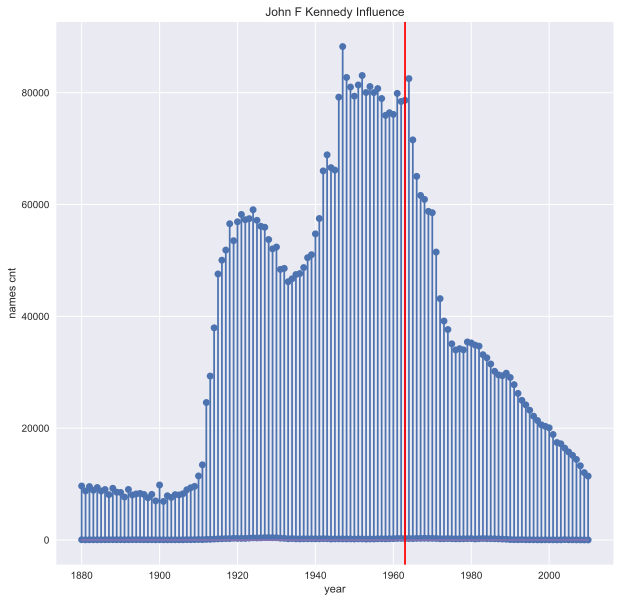

In [98]:
df_name = baby[baby['name'].str.lower() == 'john']
years_name = df_name['year'].tolist()
years_name=[int(x) for x in years_name]
plt.stem(years_name,df_name['cnt'])
plt.xlabel('year')
plt.ylabel('names cnt')
plt.title("John F Kennedy Influence")
plt.axvline(x=1963,c='red');

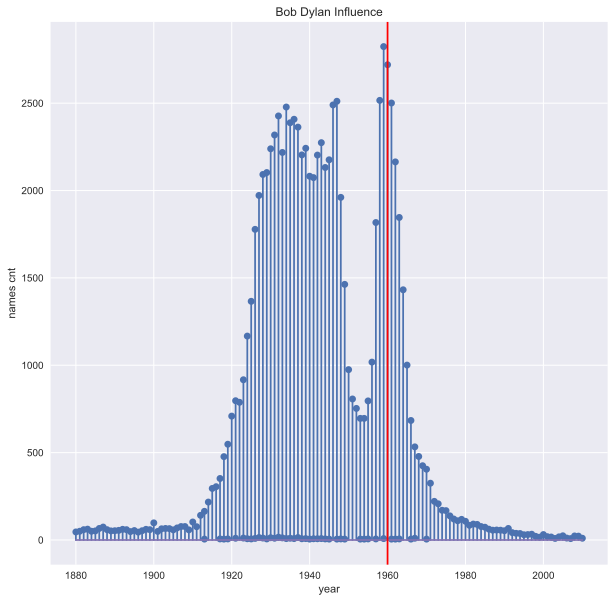

In [99]:
df_name = baby[baby['name'].str.lower() == 'bob']
years_name = df_name['year'].tolist()
years_name=[int(x) for x in years_name]
plt.stem(years_name,df_name['cnt'])
plt.xlabel('year')
plt.ylabel('names cnt')
plt.title("Bob Dylan Influence")
plt.axvline(x=1960,c='red');

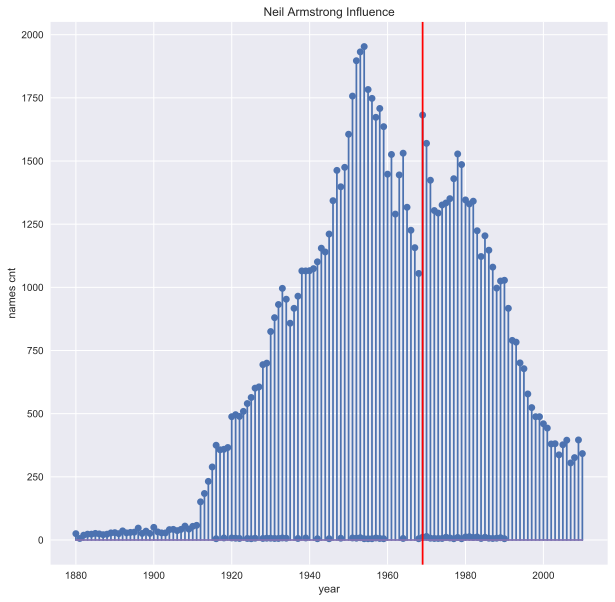

In [100]:
df_name = baby[baby['name'].str.lower() == 'neil']
years_name = df_name['year'].tolist()
years_name=[int(x) for x in years_name]
plt.stem(years_name,df_name['cnt'])
plt.xlabel('year')
plt.ylabel('names cnt')
plt.title("Neil Armstrong Influence")
plt.axvline(x=1969,c='red');

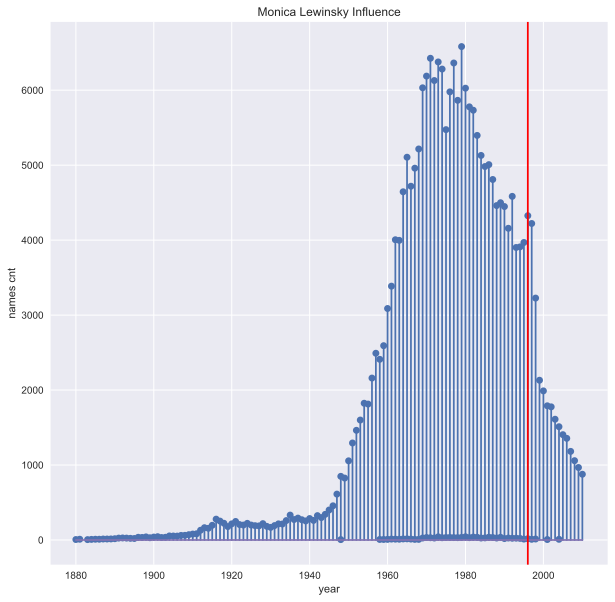

In [101]:
df_name = baby[baby['name'].str.lower() == 'monica']
years_name = df_name['year'].tolist()
years_name=[int(x) for x in years_name]
plt.stem(years_name,df_name['cnt'])
plt.xlabel('year')
plt.ylabel('names cnt')
plt.title("Monica Lewinsky Influence")
plt.axvline(x=1996,c='red');

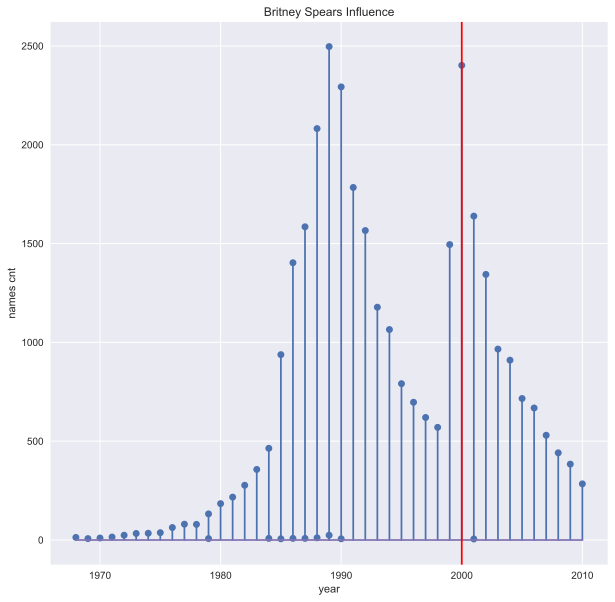

In [102]:
df_name = baby[baby['name'].str.lower() == 'britney']
years_name = df_name['year'].tolist()
years_name=[int(x) for x in years_name]
plt.stem(years_name,df_name['cnt'])
plt.xlabel('year')
plt.ylabel('names cnt')
plt.title("Britney Spears Influence")
plt.axvline(x=2000,c='red');